# Chapter 5. 정규선형모델

## 2. 분산분석

* 종속변수: 매상
* 독립변수: 날씨(흐림, 비, 맑음)


#### "날씨에 따라 매상이 변화한다고 말할 수 있는지 확인해보기!"

### 5.2.8. 분석준비

In [5]:
# 수치계산에 필요한 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리(경고가 나올 수 있습니다)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 5.2.9 데이터의 작성과 표시

In [6]:
# 샘플 데이터 생성
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]
beer = [6,8,2,4,10,12]

# 데이터프레임으로 결합
weather_beer = pd.DataFrame({
    "beer"   : beer,
    "weather": weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


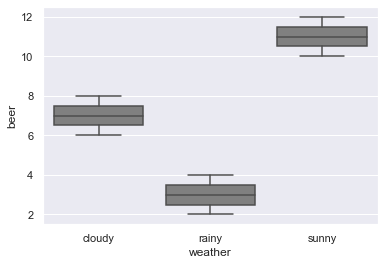

In [7]:
# BoxPlot
sns.boxplot(x = "weather",y = "beer",
            data = weather_beer, color='gray')

In [8]:
# 각 데이터의 평균값
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy      7
rainy       3
sunny      11


### 5.2.10 분산분석(1): 군간 제곱과 군내 제곱 계산

In [1]:
# 날씨에 의한 영향
effect = [7,7,3,3,11,11]

In [2]:
# 군간 제곱합
mu_effect = np.mean(effect)
squares_model = np.sum((effect - mu_effect) ** 2 )
squares_model

NameError: name 'np' is not defined

In [3]:
# 오차 = 원래 데이터 - 효과
resid = weather_beer.beer - effect
resid

NameError: name 'weather_beer' is not defined

In [4]:
# 군내 제곱합
squares_resid = np.sum(resid ** 2)
squares_resid

NameError: name 'np' is not defined

### 5.2.11 분산분석(2): 군간 분산과 군내 분산 계산

In [10]:
df_model = 2 # 군간변동의 자유도
df_resid = 3 # 군내변동의 자유도

In [5]:
# 군간 평균제곱(분산)
variance_model = squares_model / df_model
variance_model

NameError: name 'squares_model' is not defined

In [12]:
# 군내 평균제곱(분산)
variance_resid = squares_resid / df_resid
variance_resid

2.000

### 5.2.12 분산분석(3): p값 계산

In [6]:
# F비
f_ratio = variance_model / variance_resid
f_ratio

NameError: name 'variance_model' is not defined

In [7]:
# p값
1 - sp.stats.f.cdf(x=f_ratio,dfn=df_model,dfd=df_resid)

NameError: name 'sp' is not defined

### 5.2.15 statsmodels를 이용한 분산분석

In [8]:
# 정규 선형 모델의 구축
anova_model = smf.ols("beer ~ weather", 
                      data = weather_beer).fit()

NameError: name 'smf' is not defined

In [9]:
# 분산 분석 결과
print(sm.stats.anova_lm(anova_model, typ=2))

NameError: name 'sm' is not defined

### 5.2.17 모델의 계수 해석

In [22]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

### 5.2.18 모델을 사용해서 오차와 효과 분리하기

In [10]:
#훈련데이터 적용 결과
fitted = anova_model.fittedvalues
fitted

NameError: name 'anova_model' is not defined

In [11]:
# 잔차값
anova_model.resid

NameError: name 'anova_model' is not defined

### 5.2.19 회귀모델의 분산분석

In [4]:
# 데이터 읽어 들이기
beer = pd.read_csv("5-1-1-beer.csv")

# 모델 추정
lm_model = smf.ols(formula = "beer ~ temperature", 
                   data = beer).fit()

In [5]:
df_lm_model = 1  # 모델의 자유도
df_lm_resid = 28 # 잔차의 자유도

In [6]:
# 모델을 적용한 값
lm_effect = lm_model.fittedvalues
# 잔차
lm_resid = lm_model.resid
# 기온의 효과와 크기
mu = sp.mean(lm_effect)
squares_lm_model = sp.sum((lm_effect - mu) ** 2)
variance_lm_model = squares_lm_model / df_lm_model
# 잔차의 크기
squares_lm_resid = sp.sum((lm_resid) ** 2)
variance_lm_resid = squares_lm_resid / df_lm_resid
# F비
f_value_lm = variance_lm_model / variance_lm_resid
f_value_lm

28.447

In [12]:
# P값이 거의 0이 되어버림
1 - sp.stats.f.cdf(
    x=f_value_lm,dfn=df_lm_model,dfd=df_lm_resid)

NameError: name 'sp' is not defined

In [36]:
# 분산분석표 출력
print(sm.stats.anova_lm(lm_model, typ=2))

                  sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN


In [13]:
# Sumamry
lm_model.summary()

NameError: name 'lm_model' is not defined